<a href="https://colab.research.google.com/github/gowtham33399/Playstore-Apps-Data-Analysis-/blob/main/Individual_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>
#Google Play Store, previously Android market, is a virtual distribution provider operated and advanced by using Google. It serves because the legit app shop for licensed devices jogging at the Android running machine , allowing users to browse and download applications advanced with the Android software program improvement kit and posted via Google.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
import plotly.express as px


In [ ]:
file_path ='/content/drive/My Drive/PLAYSTORE CAPSTONE/Play Store Data.csv'
playstoredf = pd.read_csv(file_path)
user_reviews = pd.read_csv('/content/drive/My Drive/PLAYSTORE CAPSTONE/User Reviews.csv')


In [ ]:
type(playstoredf) 

pandas.core.frame.DataFrame

In [ ]:
playstoredf.head() #TOP 5 ROWS 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstoredf.tail()# last 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
playstoredf.shape

(10841, 13)

In [ ]:
playstoredf.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


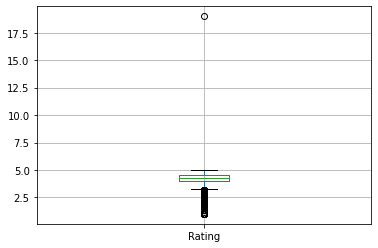

In [ ]:
playstoredf.boxplot()  #box plot before data cleaning

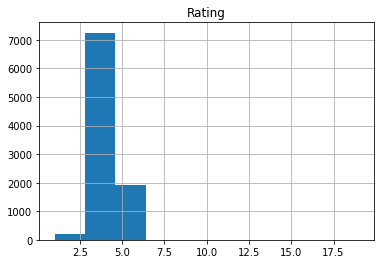

In [ ]:
playstoredf.hist(); #histogram before data cleaning

#**DATA CLEANING**

In [ ]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
playstoredf.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
playstoredf.isnull().sum() #SUM OF THE NULL VALUES

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **CHECKING HOW MANY OUTLIERS ARE THERE**

In [ ]:
playstoredf[playstoredf.Rating>5] #ratings greater than 5 will be treated as outliers because ratings cannot be greater than 5 , so cleaing this value.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
playstoredf.drop([10472], inplace=True)

In [ ]:
playstoredf[10470:10475] #cleared the outlair data.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


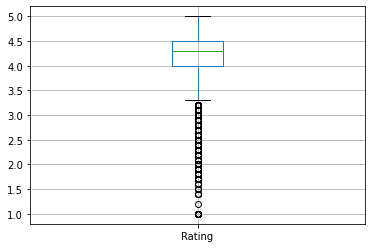

In [ ]:
playstoredf.boxplot(); #there is no rating greater than 5, thus cleared the outlair value

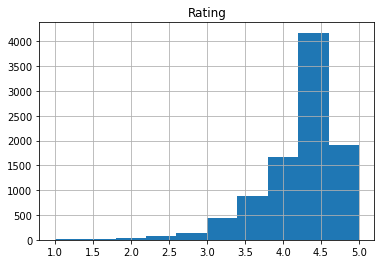

In [ ]:
playstoredf.hist();

#**Remove columns that are 90% empty**

In [ ]:
thershold = len(playstoredf) * 0.1
thershold

1084.0

In [ ]:
playstoredf.dropna(thresh= thershold, axis=1 ,inplace = True)

In [ ]:
print(playstoredf.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


# **Data Manipulation**

In [ ]:
def impute_median(series):
    return series.fillna(series.median)

In [ ]:
playstoredf.Rating = playstoredf[ 'Rating'].transform(impute_median)

In [ ]:
playstoredf.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
print(playstoredf['Type'].mode())
print(playstoredf['Current Ver'].mode())
print(playstoredf['Android Ver'].mode)

0    Free
dtype: object
0    Varies with device
dtype: object
<bound method Series.mode of 0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10840, dtype: object>


In [ ]:
playstoredf['Type'].fillna(str(playstoredf['Type'].mode().values[0]),inplace=True)
playstoredf['Current Ver'].fillna(str(playstoredf['Type'].mode().values[0]),inplace=True)
playstoredf['Android Ver'].fillna(str(playstoredf['Type'].mode().values[0]),inplace=True)

In [ ]:
playstoredf.isnull().sum() #NULLVALUES FINISHED 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
playstoredf['Price'] = playstoredf['Price'].apply((lambda x: str(x).replace('$','')if '$'in str (x) else str(x)))
playstoredf['Price'] = playstoredf['Price'].apply(lambda x: float(x))
playstoredf['Reviews'] = pd.to_numeric(playstoredf['Reviews'],errors = 'coerce')

In [ ]:
playstoredf['Installs'] = playstoredf['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
playstoredf['Installs'] = playstoredf['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
playstoredf['Installs'] = playstoredf['Installs'].apply(lambda x: float(x))

In [ ]:
playstoredf.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
playstoredf.describe()

,Reviews,Installs,Price
count,1.084000e+04,1.084000e+04,10840.000000
mean,4.441529e+05,1.546434e+07,1.027368
std,2.927761e+06,8.502936e+07,15.949703
min,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.000000e+03,0.000000
50%,2.094000e+03,1.000000e+05,0.000000
75%,5.477550e+04,5.000000e+06,0.000000
max,7.815831e+07,1.000000e+09,400.000000


# **DATA VISUALIZATION**

In [ ]:
grp = playstoredf.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

In [ ]:
psdf = playstoredf.round(1)

In [ ]:
#not null values
df_type_not_null=playstoredf[~playstoredf['Type'].isnull()]
df_type_not_null


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,<bound method NDFrame._add_numeric_operations....,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:

#paid vs free apps
acount_type=df_type_not_null.groupby(['Category','Type'])['App'].count().unstack().sort_values(by=['Free','Paid'],ascending=False).fillna(0)
acount_type

Type,Free,Paid
Category,,
FAMILY,1781.0,191.0
GAME,1061.0,83.0
TOOLS,765.0,78.0
BUSINESS,446.0,14.0
PRODUCTIVITY,396.0,28.0
LIFESTYLE,363.0,19.0
COMMUNICATION,360.0,27.0
SPORTS,360.0,24.0
MEDICAL,354.0,109.0


Text(0.5, 1.0, 'Category wise number of Free and Paid Apps')

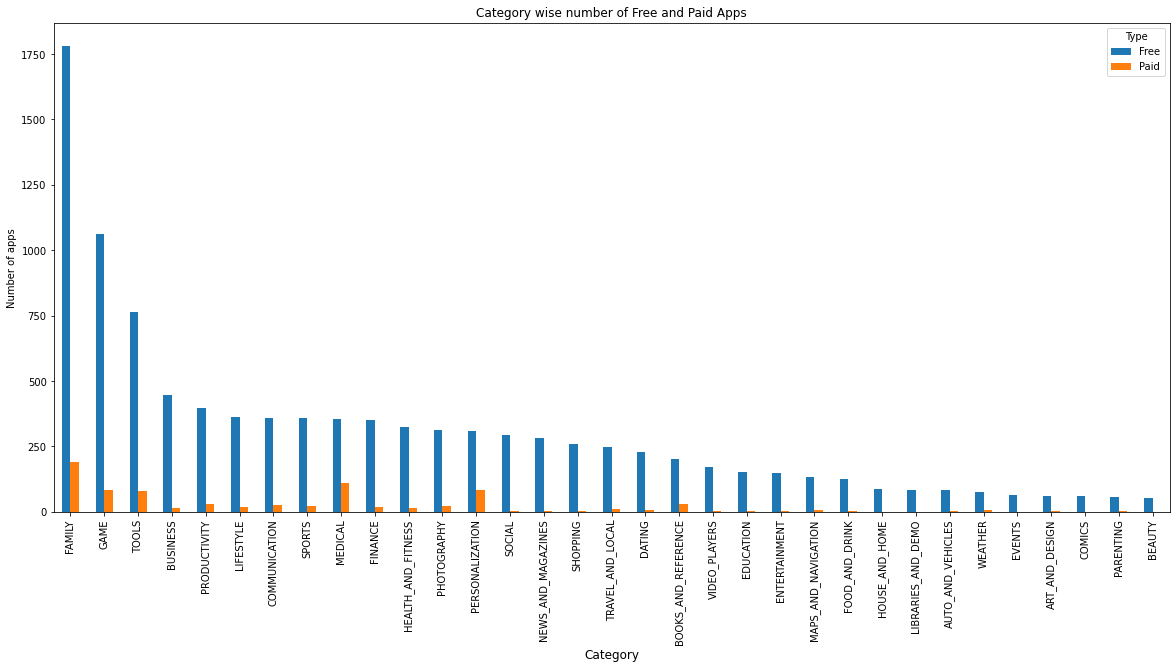

In [ ]:
#paid vs free apps
plt.rcParams['figure.figsize']=(20,9)
acount_type.plot(kind='bar')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Number of apps')
plt.title('Category wise number of Free and Paid Apps')

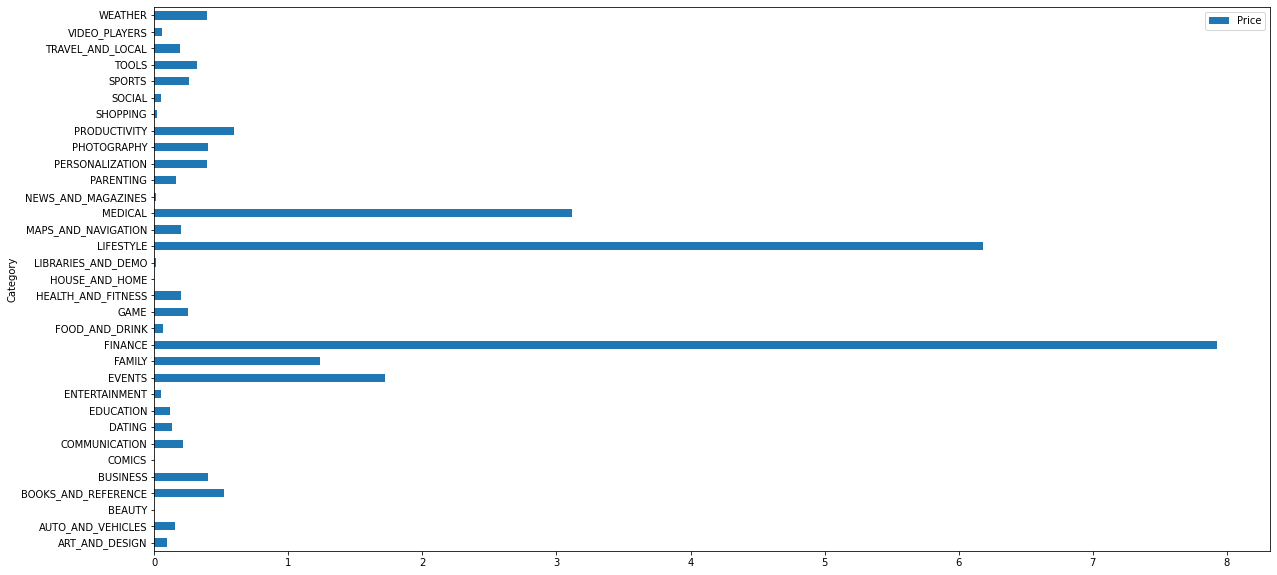

In [ ]:
#comparison b/w Categories and Pricing
plt.rcParams['figure.figsize']=(20,10)
psdf9 = psdf.loc[0: , ['Category','Price']]
psdf10 = psdf9.groupby('Category').mean('Price')
psdf10.plot.barh();


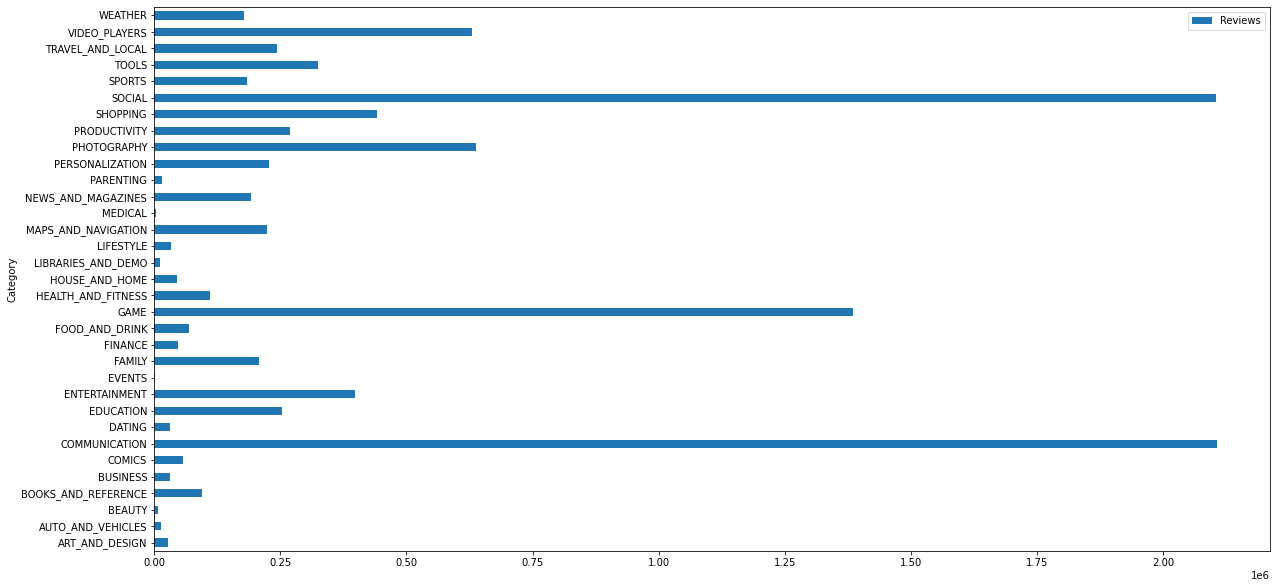

In [ ]:
#comparison b/w Categories and reviews
plt.rcParams['figure.figsize']=(20,10)
psdf9 = psdf.loc[0: , ['Category','Reviews']]
psdf10 = psdf9.groupby('Category').mean('Reviews')
psdf10.plot.barh();


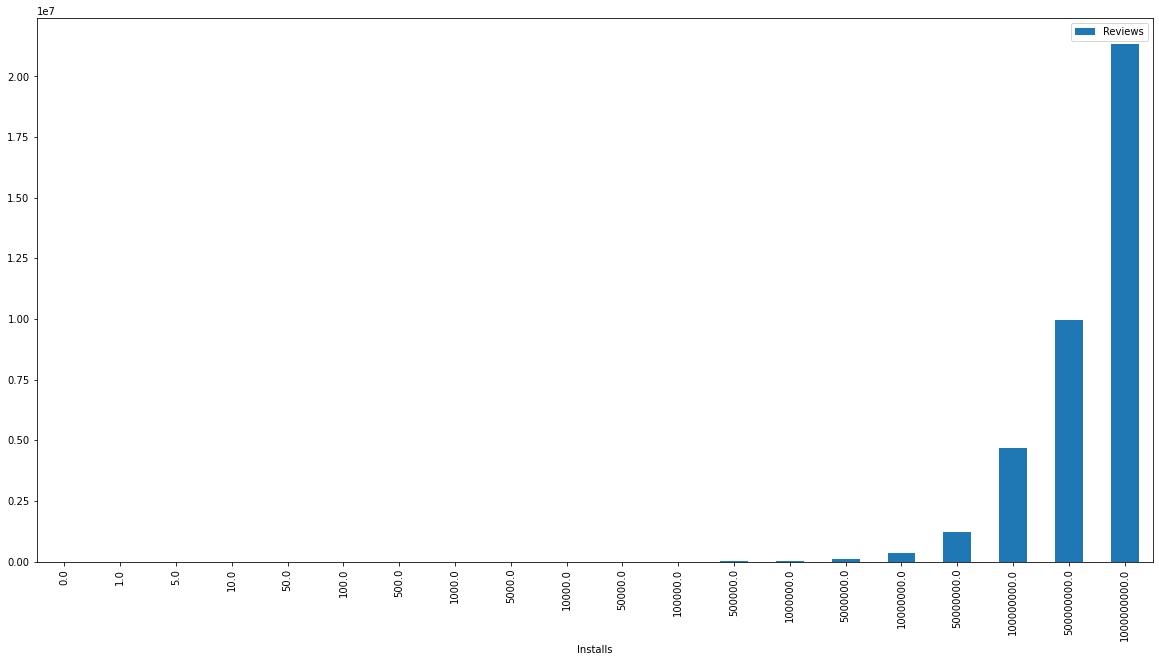

In [ ]:
#comparison b/w Reviews and installs
plt.rcParams['figure.figsize']=(20,10)
psdf9 = psdf.loc[0: , ['Reviews','Installs']]
psdf10 = psdf9.groupby('Installs').mean('Reviews')
psdf10.plot.bar();



In [ ]:
psdf = playstoredf.round(1)

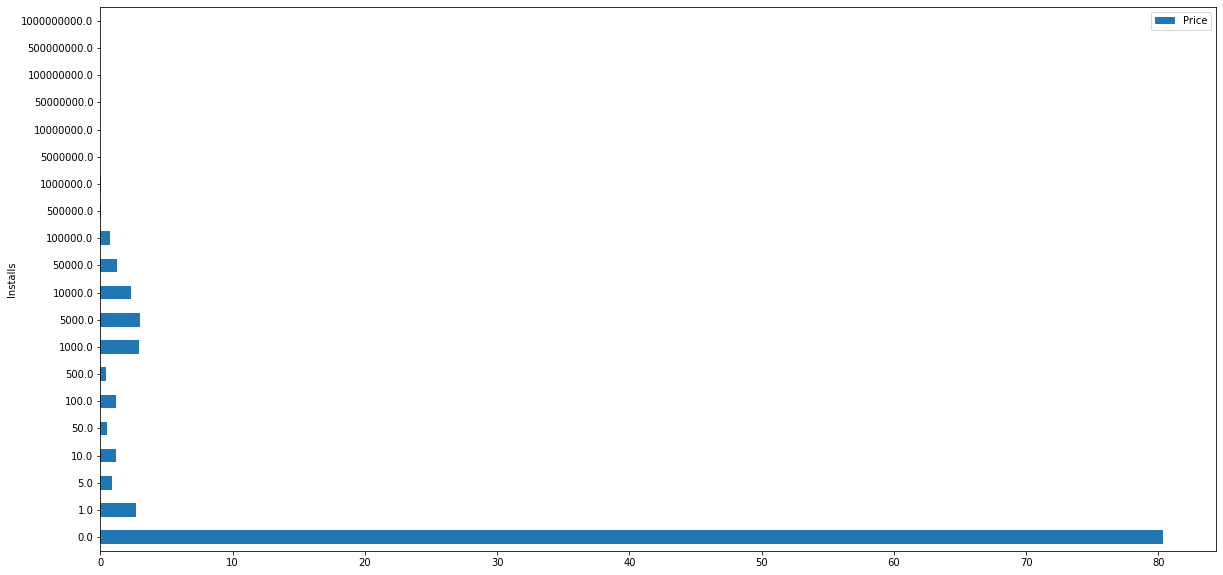

In [ ]:
#comparison b/w Price and installs
plt.rcParams['figure.figsize']=(20,10)
psdf9 = psdf.loc[0: , ['Installs','Price']]
psdf10 = psdf9.groupby('Installs').mean('Price')
psdf10.plot.barh();

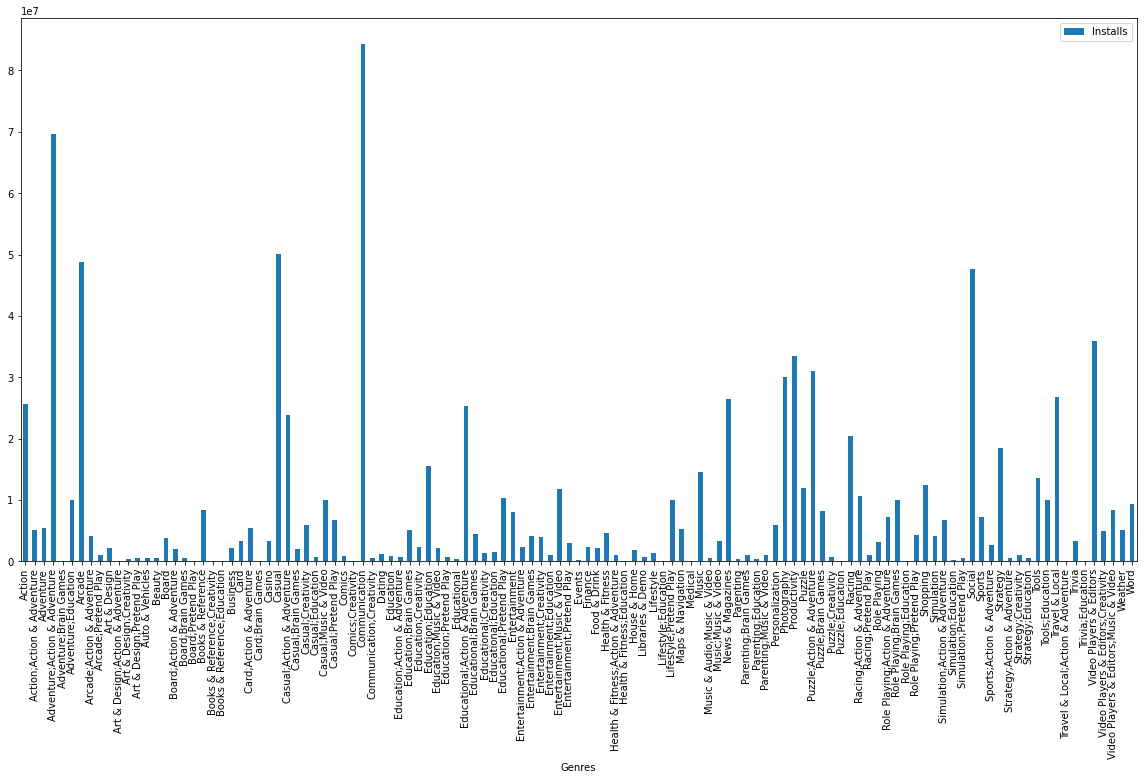

In [ ]:
#comparison b/w Generes and installs
plt.rcParams['figure.figsize']=(20,10)
psdf9 = psdf.loc[0: , ['Installs','Genres']]
psdf10 = psdf9.groupby('Genres').mean('Installs')
psdf10.plot.bar();

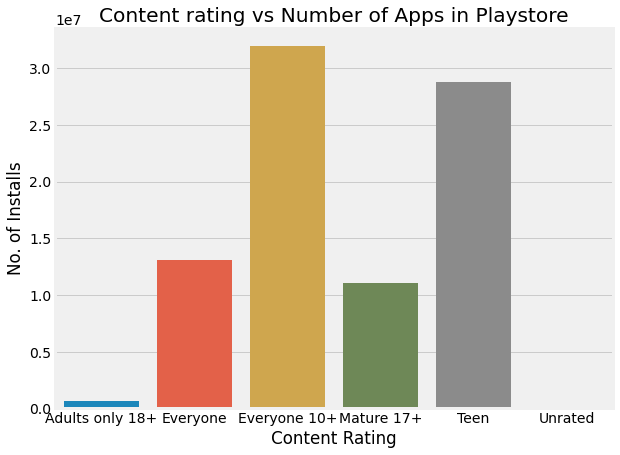

In [ ]:
# Graphical represention of content Rating vs Installs of apps:
content_installs=playstoredf.groupby(["Content Rating"])['Installs'].mean().reset_index()
content_installs_df=pd.DataFrame(content_installs)
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.barplot(y="Installs",x="Content Rating",data=content_installs_df)
plt.title("Content rating vs Number of Apps in Playstore")
plt.ylabel("No. of Installs")
plt.xlabel("Content Rating")
plt.show()

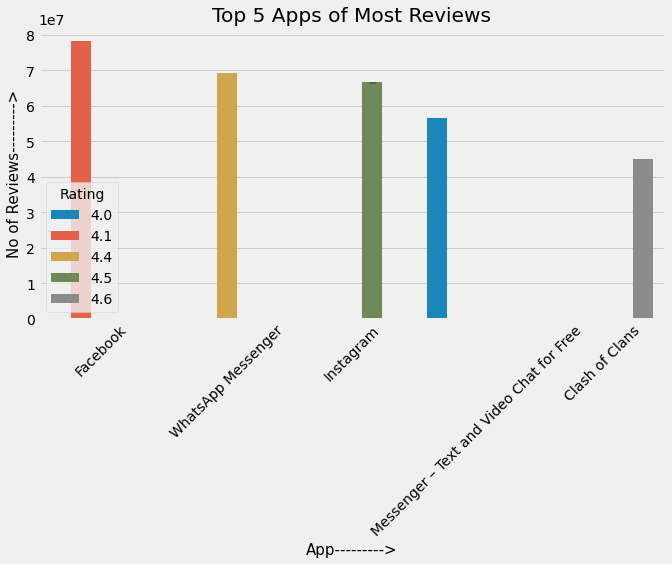

In [ ]:
#Get top 5 apps by reviews:
top_5=playstoredf.sort_values('Reviews',ascending=False).reset_index().head(15)

plt.figure(figsize=(10,5))
sns.barplot(x="App",y="Reviews",hue='Rating',data=top_5)
plt.xlabel("App--------->", fontsize=15)
plt.ylabel("No of Reviews--------->", fontsize=15)
plt.title("Top 5 Apps of Most Reviews")
plt.xticks(rotation=45)
plt.show()

In [ ]:
user_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


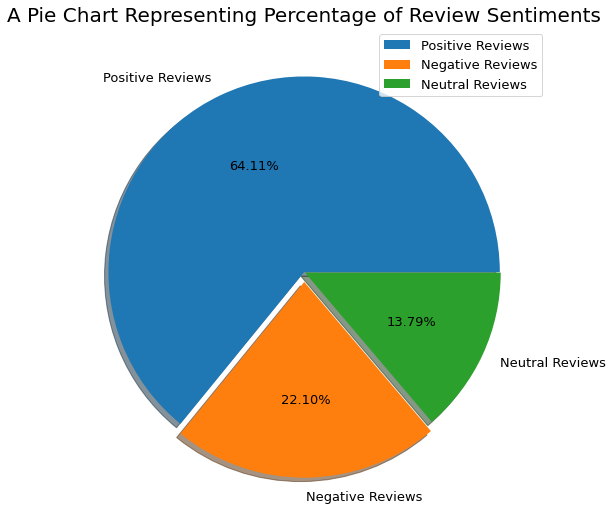

In [ ]:
# Review sentiments'percentage
counts = list(user_reviews['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.figsize'] = (9,9)
plt.pie(counts, labels=labels, explode=[0,0.05,0.005], shadow=True, autopct="%.2f%%")
plt.title( 'A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

# **Impressions and Conclusion :**
1. Data cleaning, Data Manipulation and Data Visualization are done from the given google play store data.
2. Before cleaning the data, it was found that there was an outlair data present in the given set. **ie**: The maximum rating of any app is 5, but there was a data having rating 19.This was found by implimenting boxplot and histogram.Thus the outlair data was cleared by datacleaning.
3. Null values are cleared and converted into clear numerical values by Data Manipulation.
4. Family category ranks first in both free and paid apps and Beauty category has the least amount of free and paid app users.
5. Finance category tops the table in the price followed by Lifestyle and Medical.
6. The most  number of reviews were collected from both Social and Communication category apps.
7. The apps with more reviews has the highest number of installs.
8. The apps which are free of cost has the most nymber of installs when compared to paid apps.
9. Communication category holds the top position in the installs followed by Adventure:Action and Adventure.
10. The top 5 most reviewed apps are Facebook, whatsapp Messenger, Instagram, Messenger- Text and video chat for free, Clash of clans.
11. The Majority of the apps installed inaccordance to content ratings belongs to the group everyone 10+. 
12. The pie chart represents the values of the user reviews. Among them **64.
11% of the reviews are positive, 22.10%** are negative and **13.79%** are neutral reviews.




